<a href="https://colab.research.google.com/github/RealElvince/loan-prediction-analysis/blob/main/loan_eligibility_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this ,we are going to predict whether a bank customer is eligible to get a loan or not.

import useful libraries

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import svm

load dataset

In [5]:
from google.colab import files
uploaded_files=files.upload()

Saving loan.csv to loan.csv


read the dataset
and store in variable (df)

In [6]:
df=pd.read_csv('loan.csv')
#print first 10 rows of the loan data

df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,N


print last rows of the data set

In [7]:
df.tail(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
604,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Y
605,Male,Yes,0,Not Graduate,No,2400,3800.0,NaN,180.0,1.0,N
606,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Y
607,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Y
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Y
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Y
613,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,N


information about our data set

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 52.9+ KB


Data cleaning and pre-processing( check null values,duplicate values)

check if there are null values in the dataset

In [9]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Loan_Status           0
dtype: int64

fill nulls values

In [10]:

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

df.LoanAmount=df.LoanAmount.fillna(df.LoanAmount.mean())

df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64

checking if dataset has duplicate values

In [11]:
sum_of_duplicate_values=df.duplicated().sum()
print('Sum of duplicate values is :',sum_of_duplicate_values)

Sum of duplicate values is : 0


Conclusion,there is no duplicate values in our dataset

check shape of our data set

In [13]:
shape_of_data=df.shape
print('Dataset shape is:',shape_of_data)

Dataset shape is: (614, 11)


check statisticaL info of our data

In [14]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Perform some data visualization using our dataset
-number of loan applicants group by gender

Number of loan applicants group by gender
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

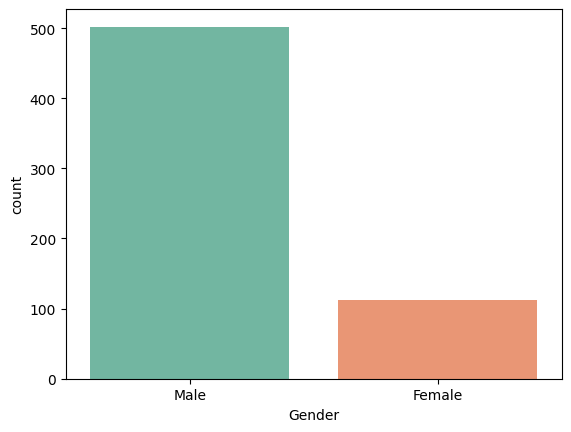

In [15]:
print('Number of loan applicants group by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df,palette="Set2")


Get count of the number of loan applicants who are : eligible and not eligible

In [16]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

split data into feature data and target data

In [17]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


split the data again into 80% training data,20% test data.

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)

Further preprocessing our data ,converting categorical variables into numerical values either StandardScaler or LabelEncoder,in this project we will use both StandardEncoder and LabelEncoder

In [24]:
from sklearn.preprocessing import LabelEncoder
le_X=LabelEncoder()
for i in range(0,10):
  X_train[:,i]=le_X.fit_transform(X_train[:,i])
  X_train[:,7]=le_X.fit_transform(X_train[:,7])

In [20]:
le_Y=LabelEncoder()
y_train=le_Y.fit_transform(y_train)
y_train

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,

label encode x_test

In [21]:
for i in range(0,10):
  X_test[:,i]=le_X.fit_transform(X_test[:,i])
  X_test[:,7]=le_X.fit_transform(X_test[:,7])

label encode y_test

In [22]:
le_Y=LabelEncoder()
y_test=le_Y.fit_transform(y_test)
y_test

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

choose a model and evaluate its performance

In [25]:
from sklearn.ensemble import RandomForestClassifier
ref_clf=RandomForestClassifier()
ref_clf.fit(X_train,y_train)


RandomForestClassifier()

accuracy of random forest classifier

In [40]:
from sklearn import metrics
y_predict=ref_clf.predict(X_test)
print('Accuracy of random forest classifier is:',metrics.accuracy_score(y_predict,y_test))
y_predict

Accuracy of random forest classifier is: 0.6991869918699187


array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

let us check accuracy of Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
nb_clf=GaussianNB()
nb_clf.fit(X_train,y_train)

GaussianNB()

Accuracy of Naive Bayes

In [39]:
y_predict=nb_clf.predict(X_test)
print('Accuracy of Naive Bayes is:',metrics.accuracy_score(y_predict,y_test))
y_predict

Accuracy of Naive Bayes is: 0.7479674796747967


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1])

Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
y_predict

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [32]:
y_predict=dt_clf.predict(X_test)
print('Accuracy of decision tree classifier is:',metrics.accuracy_score(y_predict,y_test))

Accuracy of decision tree classifier is: 0.7073170731707317


K-Nearest Neighbors

In [37]:
from sklearn.neighbors import KNeighborsClassifier
kn_clf=KNeighborsClassifier()
kn_clf.fit(X_train,y_train)
y_predict

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
y_predict=kn_clf.predict(X_test)

print('Accuracy of KNN is:',metrics.accuracy_score(y_predict,y_test))
y_predict

Accuracy of KNN is: 0.6016260162601627


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Y
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Y


Make a predictive system

In [60]:
input_data=(0,1,0,1,78,7000,360,360,0,0)
#Changing the input to numpy array
input_data_num=np.asarray(input_data)
#reshape array so that we have one data point
input_data_reshape=input_data_num.reshape(1,-1)

prediction=nb_clf.predict(input_data_reshape)
print(prediction)
if (prediction==0):
  print('The applicant is not  eligible for loan.')
else:
  print('The applicant is eligible for loan.')

[1]
The applicant is eligible for loan.
